In [54]:
def bisection(a, b, f, tolerance=1e-6, max_iterations=100):
    for i in range(max_iterations):
        c = (a + b) / 2
        if abs(f(c)) < tolerance:
            print(f"Found after {i} iterations")
            print(f"Root found at x = {c:.6f}")
            return
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
    print("Root not found. Try different intervals or change the number of maximum iterations.")

    
def newton_raphson(x0, f, df, tolerance=1e-6, max_iterations=100):
    for i in range(max_iterations):
        fx = f(x0)
        dfx = df(x0)

        x1 = x0 - (fx / dfx)

        if abs(f(x1) < tolerance):
            print(f"Found after {i + 1} iterations")
            print(f"Value found at x = {x1:.6f}")
            return
        else:
            x0 = x1
    
    print("Root not found. Try different intervals or change the number of maximum iterations.")



In [3]:
def f(x: float):
    return x ** 4 + 2 * (x ** 3) + x ** 2 + 2 * x - 40

def df(x: float):
    return 4 * (x ** 3) + 6 * (x ** 2) + 2 * x + 2

In [43]:
import matplotlib.pyplot as plt
import numpy as np

([<matplotlib.axis.XTick at 0x24f74628c50>,
 [Text(-5.0, 0, '-5.0'),
  Text(-4.0, 0, '-4.0'),
  Text(-3.0, 0, '-3.0'),
  Text(-2.0, 0, '-2.0'),
  Text(-1.0, 0, '-1.0'),
  Text(0.0, 0, '0.0'),
  Text(1.0, 0, '1.0'),
  Text(2.0, 0, '2.0'),
  Text(3.0, 0, '3.0'),
  Text(4.0, 0, '4.0'),
  Text(5.0, 0, '5.0')])

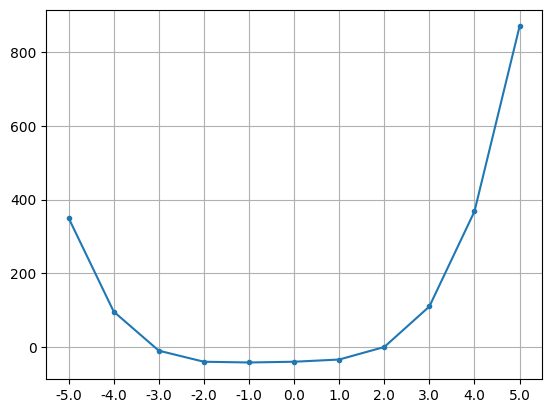

In [37]:

x = np.linspace(-5, 5, 11)
vectorized_f = np.vectorize(f)
y = f(x)

plt.plot(x, y, r".-")
plt.grid(True)
plt.xticks(x, np.round(x, 1))

In [44]:
bisection(1, 4, f)

Found after 25 iterations
Root found at x = 2.000000


In [41]:
newton_raphson(1, f, df)

Value found at x = 2.000000


In [49]:
from timeit import Timer

In [64]:
number_of_executions = 1
newton_raphson_timer = Timer("newton_raphson(1, f, df)", "from __main__ import newton_raphson, f, df")
newton_raphson_time = newton_raphson_timer.timeit(number_of_executions)
print("Newton-Raphson: ", newton_raphson_time , "ms")

print()

bisection_timer = Timer("bisection(1, 4, f)", "from __main__ import bisection, f")
bisection_time = bisection_timer.timeit(number= number_of_executions)
print("Bisection: ", bisection_time, "ms")

print()

if bisection_time < newton_raphson_time:
    print("Bisection method performed faster")
else:
    print("Newton-Raphson method performed faster")


Found after 6 iterations
Value found at x = 2.000000
Newton-Raphson:  0.0005655999993905425 ms

Found after 25 iterations
Root found at x = 2.000000
Bisection:  0.000159099989105016 ms

Bisection method performed faster
